# Marketing Project

## 1- Processing of database

In [1]:
import pandas as pd
df = pd.read_json("reviews_Digital_Music_5.json.gz", lines=True, compression="gzip")

In [2]:
df.head()

reviewerID        asin          reviewerName helpful  \
0  A3EBHHCZO6V2A4  5555991584  Amaranth "music fan"  [3, 3]   
1   AZPWAXJG9OJXV  5555991584             bethtexas  [0, 0]   
2  A38IRL0X2T4DPF  5555991584           bob turnley  [2, 2]   
3  A22IK3I6U76GX0  5555991584                 Calle  [1, 1]   
4  A1AISPOIIHTHXX  5555991584           Cloud "..."  [1, 1]   

                                          reviewText  overall  \
0  It's hard to believe "Memory of Trees" came ou...        5   
1  A clasically-styled and introverted album, Mem...        5   
2  I never thought Enya would reach the sublime h...        5   
3  This is the third review of an irish album I w...        5   
4  Enya, despite being a successful recording art...        4   

                        summary  unixReviewTime   reviewTime  
0       Enya's last great album      1158019200  09 12, 2006  
1      Enya at her most elegant       991526400   06 3, 2001  
2               The best so far      1058140800  07 14, 2003  
3  Ireland produces good music.       957312000   05 3, 2000  
4        4.5; music to dream to      1200528000  01 17, 2008

In [3]:
df['overall'].value_counts()

5    35580
4    16536
3     6789
2     3010
1     2791
Name: overall, dtype: int64

In [4]:
df.groupby('overall').describe()

unixReviewTime                                                         \
                 count          mean           std          min           25%   
overall                                                                         
1               2791.0  1.134973e+09  1.080937e+08  898819200.0  1.067299e+09   
2               3010.0  1.139639e+09  1.171784e+08  895190400.0  1.056067e+09   
3               6789.0  1.150458e+09  1.228854e+08  895017600.0  1.062288e+09   
4              16536.0  1.148717e+09  1.239388e+08  895017600.0  1.056586e+09   
5              35580.0  1.154596e+09  1.327318e+08  893721600.0  1.054231e+09   

                                                   
                  50%           75%           max  
overall                                            
1        1.117066e+09  1.187914e+09  1.405642e+09  
2        1.125230e+09  1.215346e+09  1.405123e+09  
3        1.131926e+09  1.239235e+09  1.405037e+09  
4        1.128902e+09  1.239084e+09  1.405987e+09  
5        1.130371e+09  1.257811e+09  1.406074e+09

# Visualization

### word cloud

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [6]:
#nltk.download('stopwords')

In [7]:
def plot_wordcloud(text, file_name, stopwords_list=[], max_words = 500):
    stop_words = set(stopwords.words('english'))
    stop_words.update(stopwords_list)
    # generate word cloud 
    wordcloud = WordCloud(width=1000, height = 600,
                        stopwords=stop_words,
                        max_words = max_words,
                        background_color="white").generate(text)
    # generate plot
    wordcloud.to_file(file_name + ".png")
    # Display the generated image:
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [8]:
text = " ".join(review for review in df.reviewText)
print("There are {} words in the combination of all reviews.".format(len(set(text.split(" ")))))

There are 590939 words in the combination of all reviews.


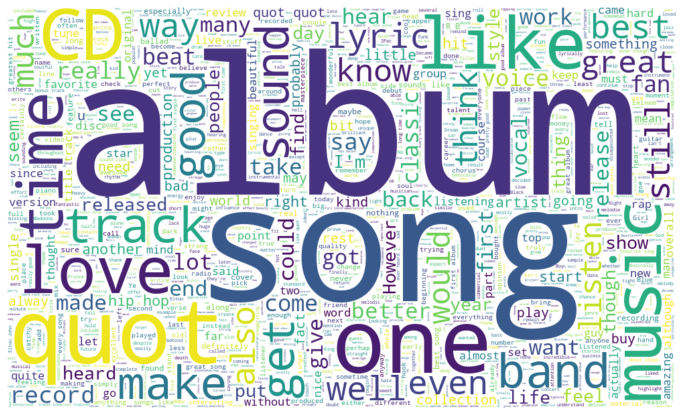

In [9]:
plot_wordcloud(text, "100ds_titles",max_words=10000)

### bubble charts of PoS tags

In [10]:
from collections import Counter
import nltk

In [11]:
#nltk.download('punkt')

In [12]:
#nltk.download('averaged_perceptron_tagger')

In [13]:
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)

In [14]:
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

MemoryError: 

In [ ]:
import plotly.express as px

In [ ]:
counts.values()

In [14]:
#data = px.data.gapminder()

fig = px.scatter(x=counts.keys(), y=counts.values(),size=counts.values()
                 ,color=counts.values(),hover_name=counts.keys(), size_max=60)
fig.update_layout(
    title="Bubble charts of PoS tags",
    xaxis_title="PoS tags (Parts of Speech Tagging)",
    yaxis_title="Counts",
)
fig.show()

# Classification

### BERT

BERT and other Transformer encoder architectures have been wildly successful on a variety of tasks in NLP (natural language processing). They compute vector-space representations of natural language that are suitable for use in deep learning models. The BERT family of models uses the Transformer encoder architecture to process each token of input text in the full context of all tokens before and after, hence the name: Bidirectional Encoder Representations from Transformers.

In [16]:
#!pip install --upgrade tensorflow-hub

In [ ]:
#!pip install --upgrade tensorflow_text

In [18]:
#!pip install --upgrade tensorflow_text

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Nader\\Anaconda3\\Lib\\site-packages\\~ensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [6]:
df['sentiment']=df['overall'].apply(lambda x: 0 if x <= 3 else 1)

In [7]:
df.head(10)

reviewerID        asin                          reviewerName   helpful  \
0  A3EBHHCZO6V2A4  5555991584                  Amaranth "music fan"    [3, 3]   
1   AZPWAXJG9OJXV  5555991584                             bethtexas    [0, 0]   
2  A38IRL0X2T4DPF  5555991584                           bob turnley    [2, 2]   
3  A22IK3I6U76GX0  5555991584                                 Calle    [1, 1]   
4  A1AISPOIIHTHXX  5555991584                           Cloud "..."    [1, 1]   
5  A2P49WD75WHAG5  5555991584                      Daniel J. Hamlow  [62, 65]   
6  A3O90G1D7I5EGG  5555991584                                  dev1    [1, 5]   
7  A3EJYJC25OJVKK  5555991584  Distant Voyageur "Nicholas Computer"    [5, 5]   
8  A1DA8VOH9NR6C7  5555991584                         E. Minkovitch    [4, 4]   
9  A33TRNCQK4IUO7  5555991584                            guillermoj  [12, 12]   

                                          reviewText  overall  \
0  It's hard to believe "Memory of Trees" came ou...        5   
1  A clasically-styled and introverted album, Mem...        5   
2  I never thought Enya would reach the sublime h...        5   
3  This is the third review of an irish album I w...        5   
4  Enya, despite being a successful recording art...        4   
5  Who knows why I initially considered this to b...        5   
6  Enya is one of a few artists whom I consider s...        3   
7  Enya is one of of the most mysterious singers ...        5   
8  This is not another lousy Celtic New Age album...        5   
9  Many times, AND WITH GOOD REASON, the "new age...        5   

                                             summary  unixReviewTime  \
0                            Enya's last great album      1158019200   
1                           Enya at her most elegant       991526400   
2                                    The best so far      1058140800   
3                       Ireland produces good music.       957312000   
4                             4.5; music to dream to      1200528000   
5  Dreamy unearthly magic continues with Eire's o...      1059523200   
6                      Have You Hugged A Tree Today?       959385600   
7            The album for a romantic autumn evening      1040428800   
8                                  Simply wonderful.      1167868800   
9  A true gem, even if you don't love conventiona...      1052697600   

    reviewTime  sentiment  
0  09 12, 2006          1  
1   06 3, 2001          1  
2  07 14, 2003          1  
3   05 3, 2000          1  
4  01 17, 2008          1  
5  07 30, 2003          1  
6  05 27, 2000          0  
7  12 21, 2002          1  
8   01 4, 2007          1  
9  05 12, 2003          1

In [8]:
df.shape

(64706, 10)

This amount of review is so hard to handle for many home computers. Therefore, we will use a sample of the dataset. Unfortunately, we can’t use all of our reviews if we don’t have access to a supercomputer.

In [9]:
df['sentiment'].value_counts()

1    52116
0    12590
Name: sentiment, dtype: int64

We notice that our dataset is umbalanced. So let's balance the dataset.

In [10]:
df['sentiment'].value_counts()[0]/df.shape[0]

0.19457237350477544

In [11]:
df['sentiment'].value_counts()[1]/df.shape[0]

0.8054276264952246

19% bad reviews, 81% good reviews: This indicates class imbalance

In [12]:
df_bad = df[df['sentiment']==0].sample(frac=0.1, random_state=1)
df_bad.shape

(1259, 10)

In [13]:
df_good = df[df['sentiment']==1].sample(frac=0.1, random_state=1)
df_good.shape

(5212, 10)

In [14]:
df_good_downsampled = df_good.sample(df_bad.shape[0])
df_good_downsampled.shape

(1259, 10)

In [15]:
df_balanced = pd.concat([df_good_downsampled, df_bad])
df_balanced.shape

(2518, 10)

In [16]:
df_balanced['sentiment'].value_counts()

0    1259
1    1259
Name: sentiment, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['reviewText'],df_balanced['sentiment'],test_size=0.2 ,stratify=df_balanced['sentiment'])

In [18]:
#X_train = df_balanced.reviewText
#y_train = df_balanced.sentiment

In [21]:
X_train.shape

(2014,)

In [22]:
X_train.head(4)

20073    Of Gentle Giant's original albums, this was th...
28267    I really don't know what's goin'on with all th...
61762    One of the great things about being a TMV fan ...
11452    The Velvet Underground, possibly because of th...
Name: reviewText, dtype: object

Now lets import BERT model and get embeding vectors for few sample statements

In [24]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [21]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "Good morning. How are you ?"]
)

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.96560353, -0.48557553, -0.9531962 ,  0.9327975 ,  0.774544  ,
        -0.2563092 ,  0.9686239 ,  0.33925107, -0.9225245 , -0.9999979 ,
        -0.6938158 ,  0.9861355 ,  0.9866025 ,  0.6803536 ,  0.97547233,
        -0.91909975, -0.7671445 , -0.68086815,  0.3501544 , -0.82125676,
         0.80643296,  0.99999875, -0.05584362,  0.40353292,  0.5889919 ,
         0.9990934 , -0.9108948 ,  0.97052276,  0.9813066 ,  0.76609   ,
        -0.863984  ,  0.18243212, -0.9925699 , -0.23919399, -0.94017136,
        -0.99566185,  0.50093645, -0.8334449 , -0.08158126, -0.02872033,
        -0.9496666 ,  0.37260756,  0.99999803,  0.15693231,  0.5729162 ,
        -0.36103386, -1.        ,  0.3322921 , -0.9571334 ,  0.9826414 ,
         0.9511925 ,  0.95668143,  0.31365672,  0.58542114,  0.64038324,
        -0.08875714, -0.01481857,  0.09065486, -0.38605672, -0.6771402 ,
        -0.6392612 ,  0.57575655, -0.94102615, -0.94582826,  0.97675055,
 

### Build Model

In [25]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [27]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

### Train the model

In [29]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
             tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-3, mode='min')
            ]

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=5, shuffle=True, batch_size = 32, verbose=True,callbacks = callbacks)

Epoch 1/5
51/51 [==============================] - 301s 6s/step - loss: 0.7192 - accuracy: 0.4991 - precision: 0.4907 - recall: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.5558 - val_precision: 0.5474 - val_recall: 0.9674 - lr: 0.0010
Epoch 2/5
51/51 [==============================] - 306s 6s/step - loss: 0.6839 - accuracy: 0.5729 - precision: 0.5647 - recall: 0.5732 - val_loss: 0.6894 - val_accuracy: 0.5261 - val_precision: 0.7727 - val_recall: 0.1581 - lr: 0.0010
Epoch 3/5
51/51 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5642 - precision: 0.5549 - recall: 0.5745
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
51/51 [==============================] - 304s 6s/step - loss: 0.6850 - accuracy: 0.5642 - precision: 0.5549 - recall: 0.5745 - val_loss: 0.7221 - val_accuracy: 0.4789 - val_precision: 0.7273 - val_recall: 0.0372 - lr: 0.0010
Epoch 4/5
51/51 [==============================] - 314s 6s/step - loss: 0.6707 - accuracy: 0.5

In [79]:
#history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
79/79 [==============================] - 386s 5s/step - loss: 0.6528 - accuracy: 0.6124 - precision: 0.6099 - recall: 0.6235
Epoch 2/5
79/79 [==============================] - 362s 5s/step - loss: 0.6474 - accuracy: 0.6299 - precision: 0.6268 - recall: 0.6418
Epoch 3/5
79/79 [==============================] - 369s 5s/step - loss: 0.6418 - accuracy: 0.6382 - precision: 0.6401 - recall: 0.6315
Epoch 4/5
79/79 [==============================] - 370s 5s/step - loss: 0.6232 - accuracy: 0.6454 - precision: 0.6452 - recall: 0.6458
Epoch 5/5
79/79 [==============================] - 372s 5s/step - loss: 0.6306 - accuracy: 0.6446 - precision: 0.6482 - recall: 0.6322


In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [32]:
print(model.evaluate(X_test, y_test))
predictions = model.predict(X_test)

16/16 [==============================] - 69s 4s/step - loss: 0.6627 - accuracy: 0.6250 - precision: 0.6465 - recall: 0.5516
[0.6626847386360168, 0.625, 0.6465116143226624, 0.5515872836112976]


NameError: name 'confusion_matrix' is not defined

In [36]:
predictions = predictions.flatten()

In [38]:
import numpy as np

predictions = np.where(predictions > 0.5, 1, 0)
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[176  76]
 [113 139]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       252
           1       0.65      0.55      0.60       252

    accuracy                           0.62       504
   macro avg       0.63      0.62      0.62       504
weighted avg       0.63      0.62      0.62       504



In view of the time model's fitting, we will save the model to use it later without re-running the code of fitting.

In [80]:
#!pip install h5py

In [81]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

Saved model to disk


In [24]:
from keras.models import load_model
model.save("network.h5")
print("Saved model to disk")

In [29]:
loaded_model = tf.keras.models.load_model(("best_model.h5"),custom_objects={'KerasLayer':hub.KerasLayer})
loaded_model.summary()
#loss, accuracy = my_reloaded_model.evaluate(X_test, y_test)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [57]:
model = loaded_model

In [43]:
#model.evaluate(X_test, y_test)

20/20 [==============================] - 84s 4s/step - loss: 0.6715 - accuracy: 0.5468 - precision: 0.5299 - recall: 0.8290


[0.6714596152305603,
 0.5467742085456848,
 0.5298969149589539,
 0.8290322422981262]

### Now, we will test our model on the second dataset

In [40]:
df2 = pd.read_json("reviews_Musical_Instruments_5.json.gz", lines=True, compression="gzip")

In [41]:
df2['sentiment']=df2['overall'].apply(lambda x: 0 if x <= 3 else 1)

In [42]:
df2.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

   sentiment  
0          1  
1          1  
2          1  
3          1  
4          1

In [43]:
df.shape

(64706, 10)

In [44]:
df2.shape

(10261, 10)

In [45]:
X_test2 = df2.reviewText.sample(frac=0.1, random_state=1)

In [46]:
y_test2 = df2.sentiment.sample(frac=0.1, random_state=1)

In [47]:
y_predicted = model.predict(X_test2)
y_predicted = y_predicted.flatten()

In [49]:
y_predicted

array([0.45554134, 0.4486903 , 0.5431389 , ..., 0.4409052 , 0.57912564,
       0.47047147], dtype=float32)

In [50]:
model.evaluate(X_test2, y_test2, verbose=0)

[0.731564462184906, 0.3742690086364746, 0.9230769276618958, 0.3178808093070984]

In [51]:
model.metrics_names

['loss', 'accuracy', 'precision', 'recall']

In [52]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, ..., 0, 1, 0])

#### Confusion matrix of BERT

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test2, y_predicted)
cm 

array([[ 96,  24],
       [618, 288]], dtype=int64)

Text(33.0, 0.5, 'Truth')

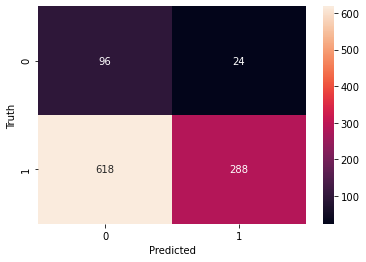

In [54]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print(classification_report(y_test2, y_predicted))

              precision    recall  f1-score   support

           0       0.13      0.80      0.23       120
           1       0.92      0.32      0.47       906

    accuracy                           0.37      1026
   macro avg       0.53      0.56      0.35      1026
weighted avg       0.83      0.37      0.44      1026



### Logistic regression, Decision Tree, KNN, SVC, Naive Bayes

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [56]:
# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(X_train)
y = y_train

In [68]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7517896667299058
Decision Tree Test Accuracy: 0.6115980522355025
KNN Test Accuracy: 0.6278742174160501
SVC Test Accuracy: 0.7509912730032252
Naive Bayes Test Accuracy: 0.7283406058306457


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 75%. That's great. So let's go with logistic regression with hyperparameter tuning.

### Logistic Regression with Hyperparameter tuning

In [69]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X,y)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X,y))

C:\Users\Nader\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan 0.62936429        nan 0.62023731        nan 0.62142857
        nan 0.63651346        nan 0.65280618        nan 0.67904951
        nan 0.70171353        nan 0.71642447        nan 0.72199028
        nan 0.72477358        nan 0.72556881        nan 0.72556881
        nan 0.72874972        nan 0.72874972        nan 0.72954259
        nan 0.73073385        nan 0.73232194        nan 0.73391161
        nan 0.7339124         nan 0.73709016        nan 0.73669491
        nan 0.73907586        nan 0.74463536        nan 0.74741866
        nan 0.74820995        nan 0.74662265        nan 0.74662265
        nan 0.7454298         nan 0.73986794        nan 0.74225204
        nan 0.74423775        nan 0.74105683        nan 0.73748462
        nan 0.73470289        nan 0.73430528        nan 0.73351163
        nan 0.73311638        nan 0.7315275         

LogisticRegression(C=0.8286427728546842, random_state=0)
The mean accuracy of the model is: 0.9229547259729944


In [70]:
X2 = tfidf_vectorizer.fit_transform(X_test2)
y2 = y_test2

In [71]:
#C=0.8286427728546842
logreg = LogisticRegression(C=0.0000001, random_state=0)
logreg.fit(X, y)
y_pred = logreg.predict(X2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2, y2)))

Accuracy of logistic regression classifier on test set: 0.49


#### Confusion matrix of Logistic Regression

In [72]:
cm2 = confusion_matrix(y2, y_pred)
cm2

array([[ 58,  62],
       [459, 447]], dtype=int64)

Text(33.0, 0.5, 'Truth')

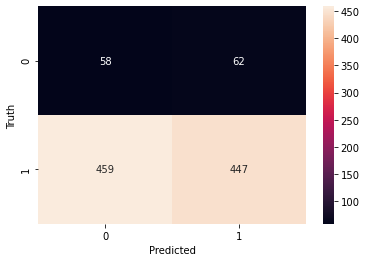

In [73]:
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Comparing BERT vs Logistic Regression

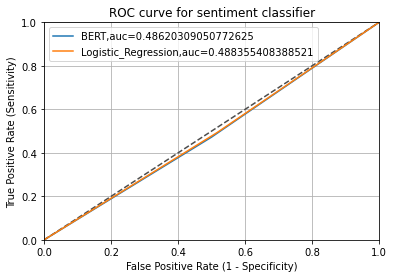

In [74]:
from sklearn.metrics import roc_curve, auc 
fpr1, tpr1, thresholds = roc_curve(y_test2, y_predicted)
fpr2, tpr2, thresholds = roc_curve(y_test2, y_pred)
auc1=auc(fpr1, tpr1)
auc2=auc(fpr2, tpr2)

ax=plt.axes()
ax.plot(fpr1, tpr1,label="BERT,auc="+str(auc1))
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
ax.plot(fpr2, tpr2,label="Logistic_Regression,auc="+str(auc2))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for sentiment classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

**Interpretation**

From the ROC curve, we find that the auc of Logistic Regression is higher than the auc of BERT. So the Logistic Regression is better than BERT.

# LDA Clustering

A very basic explanation looks like this:

Imagine you have 2 documents and these documents have 2 topics each i.e. 4 topics in total. We can say that we can represent each document using some topics and each topic can be represented by some words. What LDA does is that it takes all the words present in our documents, and randomly assign them to each topic. So if we had 10 words, each topic would be a mixture of these 10 words, but some words will have a very low weightage in some topics i.e. the word ‘cat’ would have a very low weightage in a topic about ‘software engineering’. Until now, we have 4 topics with 10 words each, and each word has an associated randomly assigned probability for that topic.

The next step for LDA is to iterate over these probabilities and improve them in such a way that we are able to maximize the probability that we can generate our original documents, using these topics. Remember, each document is a mixture of topics, and each topic is a mixture of weighted words. Our goal is to find right mixture of weighted words for each topic, such that it maximizes our chances of generating the original 2 documents if we only had these 4 topics and their associated weight words.

In [75]:
import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#!pip install spacy 

In [74]:
#!pip install gensim

In [77]:
#!pip install pyLDAvis

In [77]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\Nader\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [79]:
#import nltk
#nltk.download('stopwords') # run this one time

In [80]:
df3=df2

In [81]:
df3.dropna(axis = 0, how ='any',inplace=True) 

df3['reviewText'] = df2['reviewText'].apply(clean_text)
df3['Num_words_text'] = df2['reviewText'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(df3['overall'].value_counts())
print(len(df3))
print('-------------------------')
max_review_data_sentence_length  = df3['Num_words_text'].max()

mask = (df3['Num_words_text'] < 100) & (df3['Num_words_text'] >=20)
df_short_reviews = df3[mask]
df_sampled = df_short_reviews.groupby('overall').apply(lambda x: x.sample(n=100)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

-------Dataset --------
5    6918
4    2080
3     771
2     249
1     216
Name: overall, dtype: int64
10234
-------------------------
No of Short reviews
5996


In [82]:
df_sampled['overall'].value_counts()

1    100
2    100
3    100
4    100
5    100
Name: overall, dtype: int64

In [83]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['reviewText']=df_sampled['reviewText'].apply(remove_stopwords)

In [84]:
import en_core_web_sm

In [85]:
#nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm")
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [86]:
text_list=df_sampled['reviewText'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

attempt whats pick industry decided dive give flimsy like heavier pick always used dunlop tortex greens davas cant compete flimsy played aggression heavy rockbased material picks would hands huge disappointment
['industry', 'dive', 'flimsy', 'heavy', 'pick', 'tortex', 'green', 'flimsy', 'aggression', 'heavy', 'material', 'pick', 'huge', 'disappointment']


In [87]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [88]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [89]:
lda_model.print_topics()

[(0,
  '0.024*"cable" + 0.024*"guitar" + 0.018*"good" + 0.016*"great" + 0.012*"time" + 0.012*"little" + 0.010*"product" + 0.009*"cheap" + 0.008*"price" + 0.008*"work"'),
 (1,
  '0.015*"thing" + 0.013*"good" + 0.011*"guitar" + 0.010*"string" + 0.010*"work" + 0.010*"nice" + 0.009*"great" + 0.009*"microphone" + 0.009*"time" + 0.009*"little"'),
 (2,
  '0.021*"great" + 0.020*"guitar" + 0.015*"good" + 0.011*"work" + 0.011*"screw" + 0.009*"sound" + 0.009*"quality" + 0.008*"nice" + 0.007*"stand" + 0.007*"well"'),
 (3,
  '0.024*"good" + 0.023*"guitar" + 0.021*"string" + 0.016*"price" + 0.015*"pedal" + 0.014*"sound" + 0.012*"work" + 0.011*"product" + 0.011*"pick" + 0.011*"time"'),
 (4,
  '0.090*"strap" + 0.040*"guitar" + 0.019*"leather" + 0.016*"good" + 0.013*"lock" + 0.010*"boss" + 0.010*"nice" + 0.010*"cable" + 0.009*"time" + 0.008*"quality"'),
 (5,
  '0.033*"pedal" + 0.022*"sound" + 0.015*"guitar" + 0.015*"cable" + 0.012*"good" + 0.011*"cheap" + 0.009*"pick" + 0.008*"quality" + 0.008*"product

In [90]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.033548 -0.054832       1        1  18.372795
0     -0.035005 -0.006299       2        1  13.565802
4     -0.186384  0.040308       3        1  10.550989
2     -0.050895 -0.031370       4        1  10.539022
5      0.018773 -0.120346       5        1   9.470510
1     -0.011731 -0.024612       6        1   9.101574
7      0.027055  0.076840       7        1   8.916613
9      0.058478  0.111004       8        1   8.395387
6      0.080666  0.021474       9        1   5.792136
8      0.065494 -0.012166      10        1   5.295173, topic_info=        Term        Freq       Total Category  logprob  loglift
453    strap   94.000000   94.000000  Default  30.0000  30.0000
204    pedal   78.000000   78.000000  Default  29.0000  29.0000
269    tuner   41.000000   41.000000  Default  28.0000  28.0000
106   string  110.000000  110.000000  Default  27.0000  27.0000
139    cable   65.000000   65.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
288    first    2.157873   26.390442  Topic10  -5.4841   0.4345
48   battery    2.157850   28.686271  Topic10  -5.4841   0.3511
194    light    2.157863   34.097449  Topic10  -5.4841   0.1783
65      good    2.540594  143.463212  Topic10  -5.3208  -1.0953
219     year    2.157875   35.213034  Topic10  -5.4841   0.1461

[756 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1884      9  0.903517      100ma
623       2  0.360850   accurate
623       4  0.090213   accurate
623       7  0.360850   accurate
623       9  0.180425   accurate
...     ...       ...        ...
219       6  0.113594       year
219       7  0.085196       year
219       9  0.085196       year
219      10  0.056797       year
306       8  0.857438  yokoshima

[1568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 6, 2, 8, 10, 7, 9])

In [91]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.622417078885231

Coherence Score:  0.2735831534127173


### output topic probabilities per pos

In [92]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

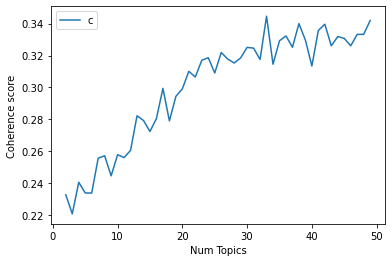

In [94]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [95]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2329
Num Topics = 3  has Coherence Value of 0.2209
Num Topics = 4  has Coherence Value of 0.2407
Num Topics = 5  has Coherence Value of 0.234
Num Topics = 6  has Coherence Value of 0.2339
Num Topics = 7  has Coherence Value of 0.2557
Num Topics = 8  has Coherence Value of 0.2573
Num Topics = 9  has Coherence Value of 0.2447
Num Topics = 10  has Coherence Value of 0.2579
Num Topics = 11  has Coherence Value of 0.2561
Num Topics = 12  has Coherence Value of 0.2607
Num Topics = 13  has Coherence Value of 0.2823
Num Topics = 14  has Coherence Value of 0.2793
Num Topics = 15  has Coherence Value of 0.2725
Num Topics = 16  has Coherence Value of 0.2806
Num Topics = 17  has Coherence Value of 0.2995
Num Topics = 18  has Coherence Value of 0.2791
Num Topics = 19  has Coherence Value of 0.2944
Num Topics = 20  has Coherence Value of 0.2992
Num Topics = 21  has Coherence Value of 0.3101
Num Topics = 22  has Coherence Value of 0.3065
Num Topics = 23  has C

In [96]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.021*"little" + 0.018*"great" + 0.017*"good" + 0.017*"sound" + 0.015*"strap" + 0.014*"guitar" + 0.008*"price" + 0.008*"product" + 0.007*"pick" + 0.006*"year"'),
 (1,
  '0.023*"guitar" + 0.021*"good" + 0.020*"cable" + 0.015*"time" + 0.012*"product" + 0.008*"string" + 0.008*"strap" + 0.007*"cord" + 0.007*"tuner" + 0.006*"cheap"'),
 (2,
  '0.029*"pedal" + 0.014*"great" + 0.009*"guitar" + 0.008*"sound" + 0.008*"time" + 0.008*"distortion" + 0.007*"tone" + 0.007*"cable" + 0.006*"unit" + 0.006*"thing"'),
 (3,
  '0.041*"string" + 0.017*"guitar" + 0.016*"well" + 0.014*"sound" + 0.010*"screw" + 0.009*"good" + 0.009*"fender" + 0.009*"price" + 0.009*"noise" + 0.008*"great"'),
 (4,
  '0.019*"good" + 0.010*"time" + 0.010*"price" + 0.009*"product" + 0.009*"string" + 0.009*"guitar" + 0.008*"work" + 0.008*"clip" + 0.008*"hard" + 0.008*"small"'),
 (5,
  '0.023*"strap" + 0.012*"guitar" + 0.012*"thing" + 0.011*"work" + 0.010*"cable" + 0.010*"time" + 0.010*"price" + 0.009*"tone" + 0.008*"pedal" + 

In [97]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.041428 -0.002423       1        1  25.083437
1      0.060647 -0.059372       2        1  13.138389
5      0.022952 -0.069186       3        1  12.723657
7      0.005939  0.038263       4        1  10.338373
2     -0.077554 -0.054571       5        1   9.803906
0      0.046527  0.048559       6        1   8.946227
3     -0.034308  0.070141       7        1   7.271527
6     -0.096103 -0.000835       8        1   6.537901
4      0.030471  0.029423       9        1   6.156584, topic_info=        Term        Freq       Total Category  logprob  loglift
106   string  106.000000  106.000000  Default  30.0000  30.0000
204    pedal   78.000000   78.000000  Default  29.0000  29.0000
453    strap   96.000000   96.000000  Default  28.0000  28.0000
346   little   59.000000   59.000000  Default  27.0000  27.0000
139    cable   64.000000   64.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
194    light    2.595716   33.277923   Topic9  -5.4501   0.2366
453    strap    2.837843   96.451458   Topic9  -5.3609  -0.7383
102  problem    2.547791   34.837286   Topic9  -5.4687   0.1722
165    cheap    2.514115   48.809791   Topic9  -5.4820  -0.1784
776     case    2.393771   28.714712   Topic9  -5.5310   0.3031

[705 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1884      6  0.451178      100ma
1799      3  0.622282       1940
1276      3  0.820609       34is
1592      2  0.844365     34lock
826       9  0.687164       58th
...     ...       ...        ...
219       6  0.169861       year
219       7  0.056620       year
219       8  0.056620       year
306       3  0.819725  yokoshima
307       3  0.622299   yorozuya

[1501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 6, 8, 3, 1, 4, 7, 5])

# Clustering

## K-Means

In [98]:
vectorizer = TfidfVectorizer(stop_words={'english'})

In [99]:
X = vectorizer.fit_transform(df2['reviewText'])

In [100]:
X.shape

(10234, 29598)

In [101]:
X

<10234x29598 sparse matrix of type '<class 'numpy.float64'>'
	with 421529 stored elements in Compressed Sparse Row format>

Each row of variable X is a vector representation of the review's text. Hence, we can use X as input for the k-means algorithm.

In [102]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

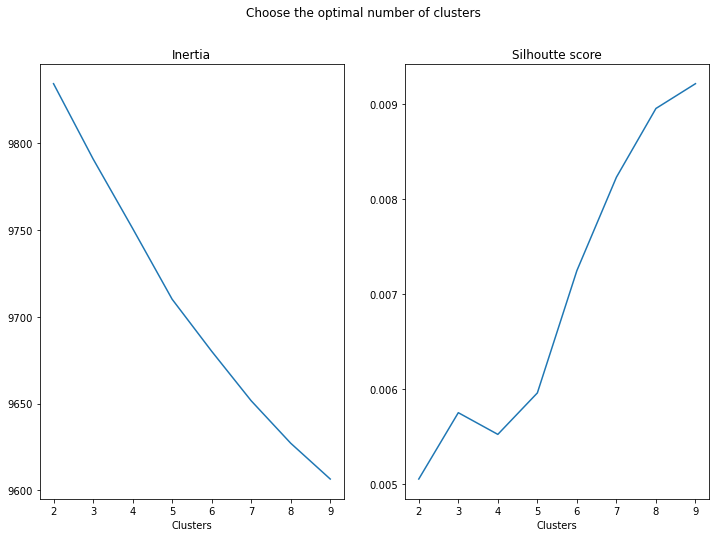

In [103]:
K = range(2,10)
Inertia = []
Silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,max_iter=200, n_init=10)
    kmeans.fit(X) 
    Inertia.append(kmeans.inertia_)
    Silhouette.append(silhouette_score(X, kmeans.labels_))
   
fig, axs = plt.subplots(1,2, figsize = (12,8))
fig.suptitle('Choose the optimal number of clusters')
axs[0].plot(K, Inertia)
axs[0].set_title("Inertia")
axs[0].set(xlabel='Clusters')
axs[1].plot(K, Silhouette)
axs[1].set_title("Silhoutte score")
axs[1].set(xlabel='Clusters')
plt.show()

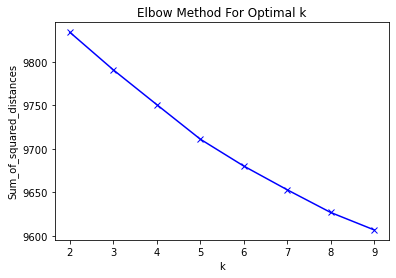

In [104]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
true_k = 6
k_means_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
k_means_model.fit(X)
labels=k_means_model.labels_
reviews_cl=pd.DataFrame(list(zip(df2['reviewText'],labels,df2['overall'])),columns=['reviewText','cluster','sentiment'])
#reviews_cl['average_sentiment_per_topic']=reviews_cl.groupby('cluster')['overall'].mean()
print(reviews_cl.sort_values(by=['cluster']))

                                              reviewText  cluster  sentiment
2420   always high quality reasonable price more dura...        0          5
6193   these cables made from quality components expe...        0          5
5355   having feet cables that used want foot stereo ...        0          5
6194   this cheaply built cable basic ends they screw...        0          3
6195   bought these replace cruddy cables that came w...        0          5
...                                                  ...      ...        ...
6492   first former touring guitarist guitar tech jun...        5          4
6493   neglected guitar awhile just back into swing t...        5          4
1306   strings like they made paperreally good price ...        5          5
1314   winds your strings durable will your strings w...        5          5
10233  these strings really quite good wouldnt call t...        5          4

[10234 rows x 3 columns]


In [107]:
reviews_cl2=pd.DataFrame(list(zip(df2['reviewText'],labels,df2['overall'])),columns=['reviewText','cluster','overall'])
reviews_cl2

reviewText  cluster  overall
0      much write about here does exactly what suppos...        4        5
1      product does exactly should quite affordablei ...        4        5
2      primary this device block breath that would ot...        4        5
3      nice windscreen protects prevents pops only th...        4        5
4      this filter great looks performs like studio f...        4        5
...                                                  ...      ...      ...
10229                          great just expected thank        4        5
10230  been thinking about trying nanoweb strings whi...        5        5
10231  have tried coated strings past including elixi...        5        4
10232  well made elixir developed with taylor guitars...        5        4
10233  these strings really quite good wouldnt call t...        5        4

[10234 rows x 3 columns]

In [108]:
reviews_cl2.groupby('cluster').mean()

overall
cluster          
0        4.546125
1        4.488542
2        4.557166
3        4.483271
4        4.458688
5        4.616785

In [126]:
df2['overall'].mean()

4.488665233535275

In [94]:
label = k_means_model.fit_predict(X)

In [97]:
label

array([1, 1, 1, ..., 5, 5, 5])

In [92]:
silhouette_score(X,k_means_model.labels_)

0.006670157592869208

In [93]:
k_means_model.score(X)

-9682.497151084706

In [98]:
from sklearn.manifold import TSNE

[[  726.73627    775.4849  ]
 [ -458.252     -946.6832  ]
 [-1244.076       79.0121  ]
 [ -145.44351    106.783134]
 [ -511.58136   1143.0806  ]
 [  760.0144    -516.0119  ]]


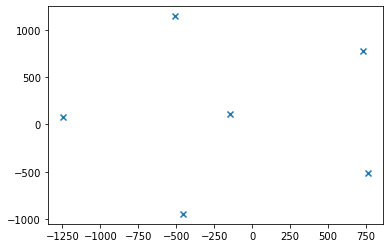

In [101]:
centroids = k_means_model.cluster_centers_
random_state = 1
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
model2 = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model2.fit_transform(centroids)
print(transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

Cluster: 0


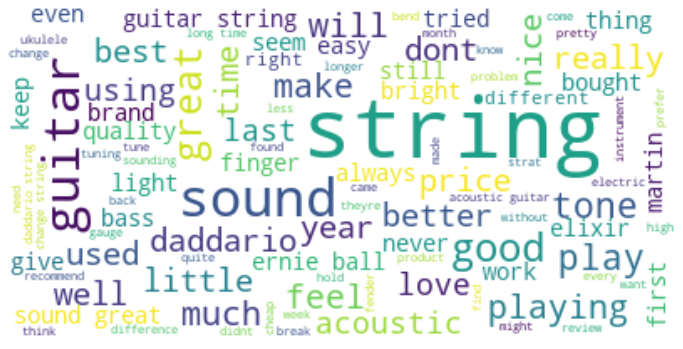

Cluster: 1


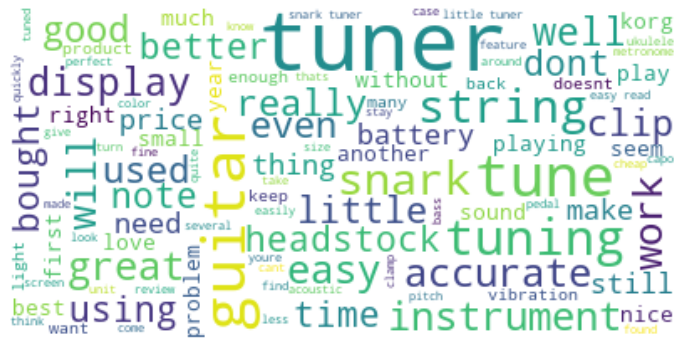

Cluster: 2


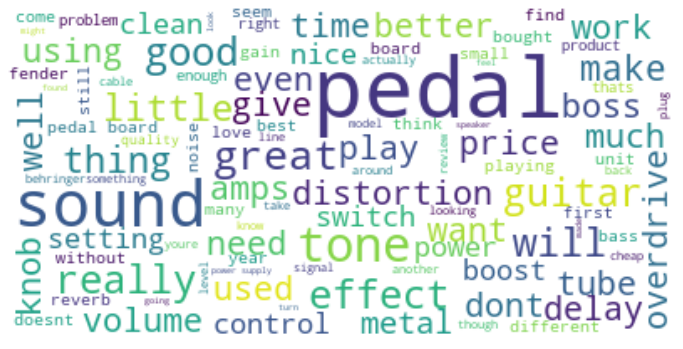

Cluster: 3


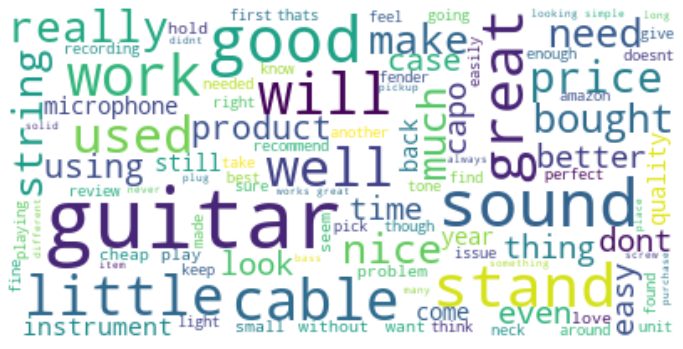

Cluster: 4


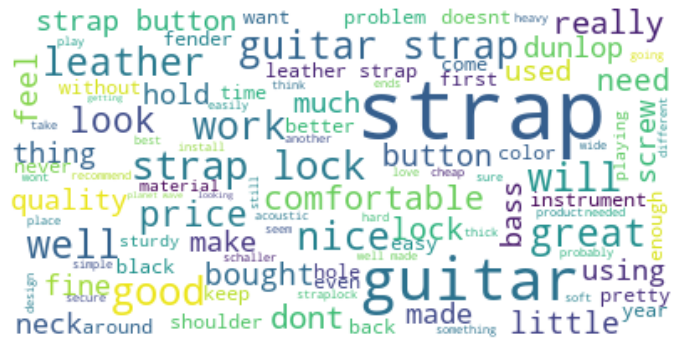

Cluster: 5


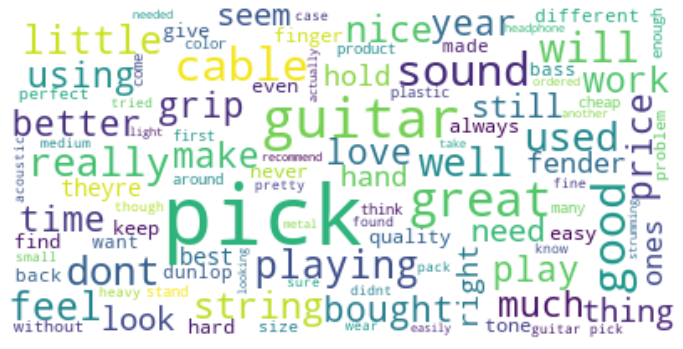

In [82]:
from wordcloud import WordCloud
result={'cluster':labels,'reviewText':df2['reviewText']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['reviewText'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   #print('Titles')
   titles=reviews_cl[reviews_cl.cluster==k]['reviewText']         
   #print(titles.to_string(index=False))
   #plot_wordcloud(text, "100ds_titles",max_words=10000)
   plt.figure(figsize=(12,8))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

Cluster 0: String

Cluster 1: Tunner

Cluster 2: pedal

Cluster 3: guitar

Cluster 4: Strap

Cluster 5: pick

**Marketing Approache**

*Through our results we can say that customers are more or less satisfied through relevant words specific to an instrument.
These keywords allowed us to group the customers according to their preferences. 
We have an average of 4/5 satisfaction opinions in each cluster group and this is due to the good marketing strategy on
the quality of the product quality, advertising*

# Conclusion